# Evaluate AO3 fanwork archive database
This notebook shows a basic review of fanwork database charactersitics, interpreting a database collected with the ao3.py query scraper functions.

In [1]:
# import specialised functions from ao3.py file
%load_ext autoreload
%autoreload 1
%aimport ao3

In [55]:
# necessary libraries. One day I will use beautiful soup.
import os
import time
import datetime
import string
import math
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from time import strptime
import ast

In [235]:
os.chdir('/Users/finn/dev/Ao3mine/data')
os.listdir('.')

['Sherlock (TV)_Annual_CreatorWaves_MonthlyActive_AO3.png',
 '.DS_Store',
 'BTS_G_Fluff_2021-01-01_ao3DB.db',
 'Sherlock_TV_2020-12-27_ao3DB.db',
 'test_test_ronnie_2020-12-27_ao3DB.db',
 'BTS_G_Fluff_2020-12-31_ao3DB.db',
 'test_Sherlock_TV_2020-12-27_ao3DB.db',
 'test_ronnie_2020-12-26_ao3DB.db',
 'test_ronnie_2020-12-27_ao3DB.db',
 'Sherlock (TV)_monthly_words_AO3.png',
 'test_test_Sherlock_TV_2020-12-27_2020-12-29_ao3DB.db',
 'Sherlock (TV)_daily_Works_AO3.png']

The extraction of the database to a useable pandas dataframe with mixes objects takes a little bit of time. A special function converts the list strings into lists again for more conveninent analysis. However, this requires iterating over the entries in stringified fields. 

It takes about 6 seconds for 2500 entries, 2 minutes for 50 000. 

In [260]:
os.chdir('/Users/finn/dev/Ao3mine/data')
sqlName = 'BTS_G_Fluff_2021-01-01_ao3DB.db'
#sqlName = 'Sherlock_TV_2020-12-27_ao3DB.db'

tic = time.time()
df_DB = ao3.ao3_sql_2_db(sqlName)
print(time.time()-tic)
print(len(df_DB))

36.55438590049744
15068


In [261]:
DB_name = 'BTS G Fluff'
df_DB

,Bookmarks,Category,Chapters,Character_tags,Collection,Comments,Complete,Creator,Date,Fandom,...,Series,Series_part,Summary,Tags,Title,Warning,Words,cURL,sURL,url
0,0,[M/M],"[1, 1]","[Kim Namjoon | RM, Jung Hoseok | J-Hope, Min Y...",0,0,Complete Work,[vkoobi],2021-01-01 00:00:00,[방탄소년단 | Bangtan Boys | BTS],...,[],[],where the moon and the sun cross paths.\n,"[Jung Hoseok | J-Hope/Kim Namjoon | RM, Kim Na...",eclipse,[No Archive Warnings Apply],1826,[https://archiveofourown.org/users/vkoobi/pseu...,[],https://archiveofourown.org/works/28464951
1,0,[M/M],"[1, 1]","[Min Yoongi | Suga, Park Jimin (BTS), Jeon Jun...",0,0,Complete Work,[virtuallyoon],2020-12-31 00:00:00,[방탄소년단 | Bangtan Boys | BTS],...,[baby mine],[3],Yoongi has been subjected to lines of tinsel d...,"[Min Yoongi | Suga/Park Jimin, Min Yoongi | Su...",rest your head close to my heart,[No Archive Warnings Apply],4058,[https://archiveofourown.org/users/virtuallyoo...,[https://archiveofourown.org/series/1730122],https://archiveofourown.org/works/28465476
2,0,[Gen],"[1, 1]","[Jeon Jungkook, Kim Taehyung | V, Park Jimin (...",0,0,Complete Work,[jks_microwave],2020-12-31 00:00:00,[방탄소년단 | Bangtan Boys | BTS],...,[],[],"“Jungkook never buys us anything,” Yoongi laug...",[Bangtan Boys | BTS Ensemble/Bangtan Boys | BT...,Let's Have Fun Together (Remembering Together),[No Archive Warnings Apply],3592,[https://archiveofourown.org/users/jks_microwa...,[],https://archiveofourown.org/works/28465137
3,38,[M/M],"[13, ?]","[Min Yoongi | Suga, Jung Hoseok | J-Hope, Kim ...",0,55,Work in Progress,[newtmasofficial],2020-12-31 00:00:00,[방탄소년단 | Bangtan Boys | BTS],...,[],[],"Social Media AU (mostly pictures, don't pay at...","[Jung Hoseok | J-Hope/Min Yoongi | Suga, Kim N...","Here, Kitty, Kitty (Social Media AU)",[No Archive Warnings Apply],0,[https://archiveofourown.org/users/newtmasoffi...,[],https://archiveofourown.org/works/25416286
4,1,[M/M],"[1, 1]","[Kim Taehyung | V, Jeon Jungkook]",0,0,Complete Work,[WordsOfHeart],2020-12-31 00:00:00,[방탄소년단 | Bangtan Boys | BTS],...,[],[],Taehyung tries covering his pimple before his ...,"[Jeon Jungkook/Kim Taehyung | V, Kim Taehyung ...",You're beautiful to me,[Choose Not To Use Archive Warnings],711,[https://archiveofourown.org/users/WordsOfHear...,[],https://archiveofourown.org/works/28463130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15063,10,[M/M],"[1, 1]","[Suga, jimin, Min Yoongi, Park Jimin]",0,3,Complete Work,[orphan_account],2014-03-10 00:00:00,[방탄소년단 | Bangtan Boys | BTS],...,[],[],My tumblr friend http://wobbily.tumblr.com/ sa...,"[Suga/Jimin, Min Yoongi/Park Jimin, Suga, jimi...",Birthday Drabble,[No Archive Warnings Apply],422,[https://archiveofourown.org/users/orphan_acco...,[],https://archiveofourown.org/works/1298713
15064,20,[M/M],"[1, 1]","[Kim Namjoon | RM, Kim Seokjin | Jin]",0,8,Complete Work,[Merixcil],2014-02-17 00:00:00,[방탄소년단 | Bangtan Boys | BTS],...,[],[],It's a weekly thing\n,"[Kim Namjoon | RM/Kim Seokjin | Jin, Kim Namjo...",Coffee,[No Archive Warnings Apply],247,[https://archiveofourown.org/users/Merixcil/ps...,[],https://archiveofourown.org/works/1198119
15065,63,"[M/M, Gen]","[1, 1]","[Min Yoongi | Suga, Kim Taehyung | V, Kim Seok...",0,26,Complete Work,[Merixcil],2014-02-01 00:00:00,[방탄소년단 | Bangtan Boys | BTS],...,[],[],"Taehyung doesn't make much sense, but after a ...","[Kim Taehyung | V & Min Yoongi | Suga, Kim Tae...",Of Ravens And Writing Desks,[No Archive Warnings Apply],1576,[https://archiveofourown.org/users/Merixcil/ps...,[],https://archiveofourown.org/works/1162966
15066,39,[M/M],"[1, 1]","[Min Yoongi | Suga, Park Jimin]",0,7,Complete Work,[dreaminginside],2013-12-21 00:00:00,[방탄소년단 | Bangtan Boys | BTS],...,[],[],Yoongi is not exactly the outdoors type.\n,"[Min Yoongi | Suga/Park Jimin, Min Yoongi | Su...",Silent Night,[No Archive Warnings Apply],1534,[https://archiveofourown.org/users/dreamingins...,[],https://archiveofourown.org/works/1092223


In [262]:
df_DB.loc[0,'Tags'][1] # test the listification of tags

'Kim Namjoon | RM'

# Basic analysis
a few calculations on the statistics of the collected metadata

In [263]:
# the number of unique creators
flatCreatorList = ao3.flatten(list(df_DB['Creator'].values))
Cs = pd.Series(data=flatCreatorList).value_counts()
print('Total number of creators of ' + DB_name + ': ' + str(len(Cs)))
Cs

Total number of creators of BTS G Fluff: 7305


orphan_account          688
spirithouse              65
wingedseok               59
KingOfHearts709          54
Eleana_Lee               54
                       ... 
Jiayuki (SaltyMenma)      1
justhere                  1
Yoontaekooks              1
Nosilverlining            1
nyanarchy                 1
Length: 7305, dtype: int64

In [264]:
len(pd.Series(data=flatCreatorList).unique())

7305

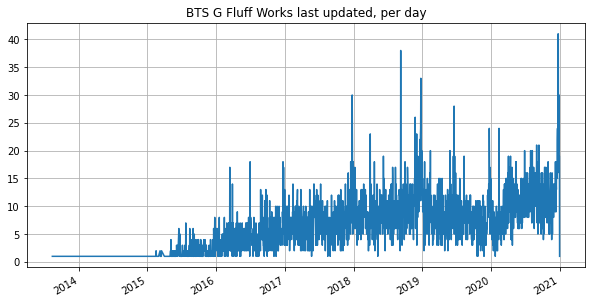

,Works
2013-08-13,1
2013-12-21,1
2014-02-01,1
2014-02-17,1
2014-03-10,1
...,...
2020-12-28,20
2020-12-29,30
2020-12-30,19
2020-12-31,19


In [265]:
# works per day
C_dates = df_DB['Date'].value_counts().sort_index()

df_dated = pd.DataFrame(index = C_dates.index)
df_dated['Works'] = C_dates.values

fig = plt.figure(figsize=(10,5))
df_dated['Works'].plot()
plt.title(DB_name + ' Works last updated, per day')
plt.grid()

plt.savefig(DB_name + '_daily_Works_AO3.png')


plt.show()

df_dated

In [272]:
months = pd.Series(pd.date_range("2014-12-01", "2021-01-01", freq="Y")) 
df_years = pd.DataFrame(index = months[:-1])

# # number of works per month
work_counts = []
creator_counts = []
creators_month = []
creators_all=[]
creators_new = []

for m_i in range(len(months)-1):
    mask = (df_set['Date']> months[m_i]) & (df_set['Date']<= months[m_i+1])
    month_works = df_set.loc[mask]

    flatCreatorList = np.unique(ao3.flatten(list(month_works['Creator'].values)))
    creators_new.append(np.setdiff1d(flatCreatorList,creators_all))
    creators_all=np.union1d(flatCreatorList,creators_all)
df_years['New_Creators'] = creators_new

Timestamp('2010-12-31 00:00:00')

In [268]:
# consider only complete works to reduce WIP effects
df_set = df_DB.loc[df_DB['Complete']=='Complete Work']
df_set = df_set.loc[df_set['Date']> months[0]]
len(df_set)

13435

In [273]:
#per month 
months = pd.Series(pd.date_range("2015-01-01", "2021-01-01", freq="M"))
df_months = pd.DataFrame(index = months[:-1])

# # number of works per month
work_counts = []
word_counts = []
Hit_counts = []
Hit_median = []
Kudo_counts = []
Kudo_median = []
creator_counts = []
creators_month = []
creators_all=[]
creators_new = []
creators_new_counts = []
for m_i in range(len(months)-1):
    mask = (df_set['Date']> months[m_i]) & (df_set['Date']<= months[m_i+1])
    month_works = df_set.loc[mask]
    
    work_counts.append(len(month_works))
    word_counts.append(month_works['Words'].sum())
    Hit_counts.append(month_works['Hits'].sum())
    Hit_median.append(month_works['Hits'].median())
    Kudo_counts.append(month_works['Kudos'].sum())
    Kudo_median.append(month_works['Kudos'].median())
    
    flatCreatorList = np.unique(ao3.flatten(list(month_works['Creator'].values)))
    creators_month.append(flatCreatorList)
    creators_new.append(np.setdiff1d(flatCreatorList,creators_all))
    creators_new_counts.append(len(np.setdiff1d(flatCreatorList,creators_all)))
    creator_counts.append(len(flatCreatorList))
    creators_all=np.union1d(flatCreatorList,creators_all)
df_months['Works'] = work_counts
df_months['Words'] = word_counts
df_months['Kudos'] = Kudo_counts
df_months['Hits'] = Hit_counts
df_months['Median Kudos'] = Kudo_median
df_months['Median Hits'] = Hit_median
df_months['Creator Count'] = creator_counts
df_months['Creator New Count'] = creators_new_counts
df_months['Creators'] = creators_month
df_months['Creators New'] = creators_new
df_months

,Works,Words,Kudos,Hits,Median Kudos,Median Hits,Creator Count,Creator New Count,Creators,Creators New
2015-01-31,9,37719,4757,84849,415.0,5193.0,7,7,"[bgarnetgirl, interrupted, jiminimini, jinprnc...","[bgarnetgirl, interrupted, jiminimini, jinprnc..."
2015-02-28,9,20371,3224,50031,274.0,3356.0,9,8,"[Fiathe, bbomb, chunnie27, cremelatte, indomie...","[Fiathe, bbomb, chunnie27, cremelatte, indomie..."
2015-03-31,5,9430,3627,62957,253.0,3544.0,5,4,"[diggyko, infinitizeit, jdooly, jinprncss, tea...","[diggyko, infinitizeit, jdooly, teashopquest]"
2015-04-30,25,44328,20205,255800,234.0,3257.0,21,18,"[Fiathe, Fuyukaidesu00, Misha (minsyvb), Sockn...","[Fuyukaidesu00, Misha (minsyvb), Socknm, SugaV..."
2015-05-31,41,92512,15349,230375,281.0,4616.0,29,24,"[Elemir, HDShadowCat, JemStone, Skeletoncarrot...","[Elemir, HDShadowCat, JemStone, Skeletoncarrot..."
...,...,...,...,...,...,...,...,...,...,...
2020-07-31,321,2249289,26274,316568,40.0,453.0,262,144,"[0_0U_U0_0, 1Attaetion, 41purpose, 5297275, 52...","[41purpose, ARoseForYoongi, Amlika, Andrea1456..."
2020-08-31,273,1149963,22081,230077,41.0,463.0,219,122,"[19ARMY923457, 1Attaetion, 28strange, A_Nighti...","[A_Nightingale, Ahlamahlu, Bangtanstrawberrylo..."
2020-09-30,281,2036476,22772,282697,40.0,453.0,236,131,"[19ARMY923457, 28strange, 2byul_ksj, 2oonie, A...","[2byul_ksj, Allthebiases, BattlefieldBTS, Blue..."
2020-10-31,254,1108021,16443,183314,41.0,416.5,216,117,"[0neiroi, 19ARMY923457, Akemi92, Amnesiafixese...","[0neiroi, Amnesiafixeseverything24, Animinali,..."


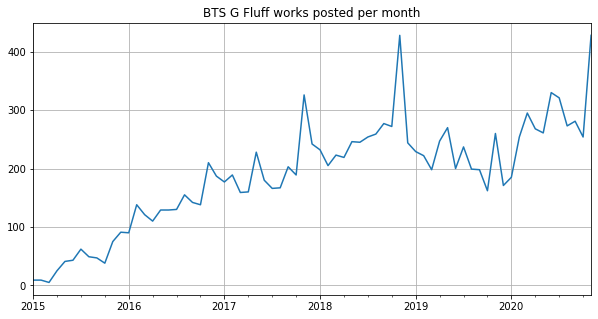

In [278]:
 # try this with only single chapter works?
fig = plt.figure(figsize=(10,5))
df_months['Works'].plot()
plt.title(DB_name + ' works posted per month')
plt.grid()
plt.savefig(DB_name + '_monthly_works_AO3.png')

plt.show()

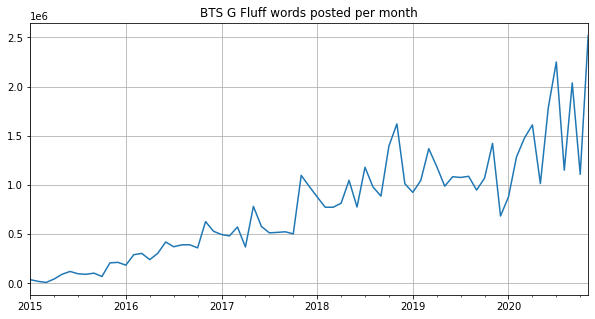

In [274]:
 # try this with only single chapter works?
fig = plt.figure(figsize=(10,5))
df_months['Words'].plot()
plt.title(DB_name + ' words posted per month')
plt.grid()
plt.savefig(DB_name + '_monthly_words_AO3.png')

plt.show()

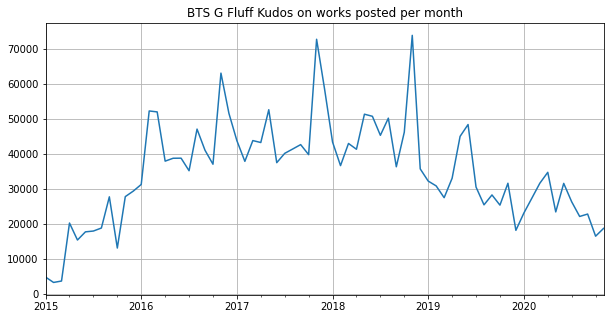

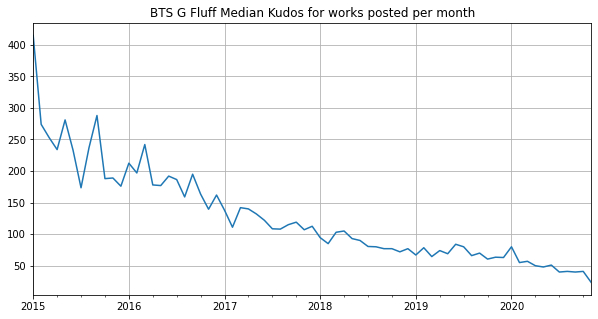

In [275]:
 # try this with only single chapter works?
fig = plt.figure(figsize=(10,5))
df_months['Kudos'].plot()
plt.title(DB_name + ' Kudos on works posted per month')
plt.grid()
plt.savefig(DB_name + '_monthly_kudos_AO3.png')

plt.show()

fig = plt.figure(figsize=(10,5))
df_months['Median Kudos'].plot()
plt.title(DB_name + ' Median Kudos for works posted per month')
plt.grid()
plt.savefig(DB_name + '_monthly_kudos_median_AO3.png')

plt.show()

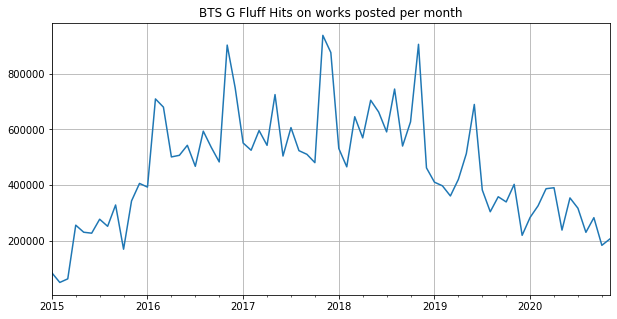

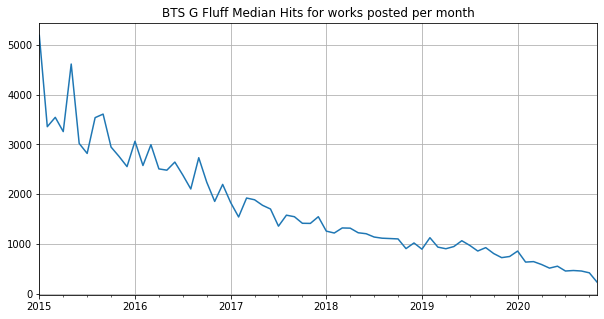

In [276]:
 # try this with only single chapter works?
fig = plt.figure(figsize=(10,5))
df_months['Hits'].plot()
plt.title(DB_name + ' Hits on works posted per month')
plt.grid()
plt.savefig(DB_name + '_monthly_Hits_AO3.png')

plt.show()

fig = plt.figure(figsize=(10,5))
df_months['Median Hits'].plot()
plt.title(DB_name + ' Median Hits for works posted per month')
plt.grid()
plt.savefig(DB_name + '_monthly_Hits_median_AO3.png')

plt.show()

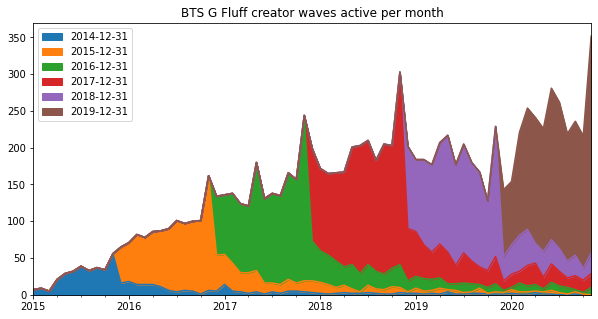

In [277]:
# make wave counts
df_waves = pd.DataFrame(index = df_months.index)

for i in range(len(df_years)):
    wave=df_years.index[i].date()
    c = np.zeros(len(df_months))
    for j in range(len(df_months)):
        c[j]=len(np.intersect1d(df_years.New_Creators.iloc[i],df_months.Creators.iloc[j]))
    df_waves[wave] = c

#fig = plt.figure(figsize=(10,5))
df_waves.plot.area(figsize=(10,5))  
plt.title(DB_name + ' creator waves active per month')
plt.legend
plt.savefig(DB_name + '_Annual_CreatorWaves_MonthlyActive_AO3.png')

plt.show()
